In [4]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [15]:
directory = os.getcwd()
data = pd.read_csv(directory + '/EMS_2017_2018_cat_final.csv', sep=',') 

In [16]:
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,...,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,...,8.0,0,23,12,23,12,0,1,0,1
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,...,8.0,0,23,12,23,12,23,12,23,12
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,...,7.0,0,23,12,23,12,23,12,23,12
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,...,7.0,0,23,12,23,12,23,12,23,12
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,...,9.0,0,23,12,23,12,23,12,23,12


In [17]:
data = data.drop(columns = ["INCIDENT_DATETIME","FIRST_ASSIGNMENT_DATETIME","FIRST_ACTIVATION_DATETIME","FIRST_ON_SCENE_DATETIME"])

In [18]:
data.head()

,CAD_INCIDENT_ID,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,...,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
0,183654386,14,2,8,461.0,453.0,0,1,12,11201.0,...,8.0,0,23,12,23,12,0,1,0,1
1,183654358,92,2,25,328.0,303.0,0,1,12,11201.0,...,8.0,0,23,12,23,12,23,12,23,12
2,183654307,92,2,25,134.0,109.0,0,1,12,11215.0,...,7.0,0,23,12,23,12,23,12,23,12
3,183654254,81,6,11,425.0,414.0,0,1,12,11201.0,...,7.0,0,23,12,23,12,23,12,23,12
4,183654246,84,7,10,898.0,888.0,0,1,12,11215.0,...,9.0,0,23,12,23,12,23,12,23,12


In [19]:
#shuffle the data
data['r'] = np.random.random(data.shape[0]) 
data = data.sort_values(by = 'r').reset_index(drop = True)
data = data.drop('r', 1)

In [20]:
#using 100,000 rows just for this exercise - for real modeling use all data
data = data[:100000]

In [21]:
data.shape

(100000, 24)

***LINEAR REGRESSION***

Create linear regression model and fit with training dataset

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
#X is predictors, Y is value to be predicted
X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY"])
Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY"]

In [112]:
#splitting into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [113]:
X_test.shape

(25000, 23)

In [123]:
Y_test.head()

64408    501.0
88507    549.0
28280    650.0
61958    282.0
10985    714.0
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [114]:
#create linear regression model
linreg = LinearRegression()
linreg = linreg.fit(X_train,Y_train) #fit model with training data

In [115]:
#Intercept
print(linreg.intercept_)

-1.7962520360015333e-11


In [116]:
#Coefficients/Slopes for each predictor
a = pd.DataFrame(linreg.coef_.transpose(),columns = ["Coefficient"])
b = pd.DataFrame(X_train.columns, columns = ["Predictors"])
coeff = pd.concat([a,b],axis=1)
coeff

,Coefficient,Predictors
0,-6.503478e-21,CAD_INCIDENT_ID
1,2.684294e-15,INITIAL_CALL_TYPE
2,-3.457545e-14,INITIAL_SEVERITY_LEVEL_CODE
3,-1.000000e+00,DISPATCH_RESPONSE_SECONDS_QY
4,1.000000e+00,INCIDENT_RESPONSE_SECONDS_QY
5,1.268626e-13,HELD_INDICATOR
6,3.832134e-14,BOROUGH
7,-3.645286e-15,INCIDENT_DISPATCH_AREA
8,1.778060e-15,ZIPCODE
9,-2.356746e-16,POLICEPRECINCT


In [117]:
#R2 value
r_sq = linreg.score(X_test,Y_test)
r_sq

1.0

***Model Predictions***

In [118]:
#estimate predictions from model
Y_pred = linreg.predict(X_test)
Y_pred

array([501., 549., 650., ..., 299., 360., 429.])

***Linear Regression Equation***

In [119]:
#This is the same as y_pred above but calculated using linear equation
y_eq = linreg.intercept_ +np.sum(linreg.coef_ *X_test, axis=1)

Plot real vs predicted travel times as scatterplot.

In [125]:
Y_pred

array([501., 549., 650., ..., 299., 360., 429.])

In [137]:
vals = pd.DataFrame({"Actual": Y_test,"Predicted": Y_pred})
vals.head()

,Actual,Predicted
64408,501.0,501.0
88507,549.0,549.0
28280,650.0,650.0
61958,282.0,282.0
10985,714.0,714.0


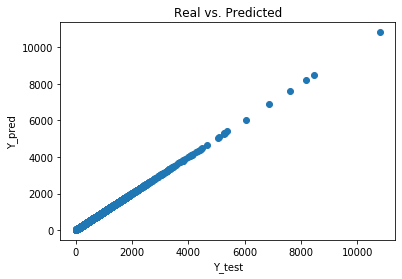

In [126]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title("Real vs. Predicted")
plt.show()

***RESIDUALS***

Residual = Actual - Predicted

In [ ]:
#ISSUES: putting Y_test & Y_pred in a single df: how to match??

In [128]:
vals["residuals"] = vals["Actual"]-vals["Predicted"]
vals

,Actual,Predicted,residuals
64408,501.0,501.0,1.477929e-12
88507,549.0,549.0,-4.547474e-13
28280,650.0,650.0,-1.023182e-12
61958,282.0,282.0,-1.477929e-12
10985,714.0,714.0,9.094947e-13
38068,522.0,522.0,-7.958079e-13
90814,428.0,428.0,-9.663381e-13
83990,397.0,397.0,-9.094947e-13
64501,419.0,419.0,5.115908e-13
85662,489.0,489.0,-7.389644e-13


***Distribution of Residuals***

Residuals should be approx normally distributed - they shouldn't follow a pattern. This can be inspected by plotting residuals as a histogram and/or using a probability plot.

In [74]:
from scipy import stats

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.3000e+01, 1.1500e+02, 1.6735e+04, 8.1230e+03]),
 array([-2.68300937e-11, -2.37832865e-11, -2.07364792e-11, -1.76896719e-11,
        -1.46428647e-11, -1.15960574e-11, -8.54925020e-12, -5.50244295e-12,
        -2.45563569e-12,  5.91171556e-13,  3.63797881e-12]),
 <a list of 10 Patch objects>)

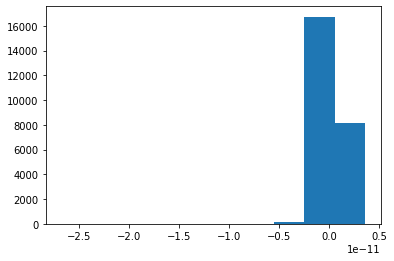

In [129]:
plt.hist(vals["residuals"])

((array([-4.03137704, -3.81788977, -3.70118272, ...,  3.70118272,
          3.81788977,  4.03137704]),
  array([-2.68300937e-11, -2.19984031e-11, -1.04591891e-11, ...,
          3.63797881e-12,  3.63797881e-12,  3.63797881e-12])),
 (9.6831211021595e-13, -2.6732358548997228e-14, 0.9333092244275399))

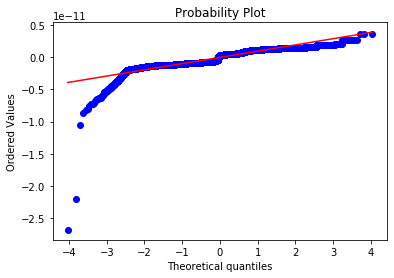

In [130]:
#plots residuals vs normal distribution, red line shows best-fit line for the data
stats.probplot(vals["residuals"],plot=plt)

In [131]:
stats.kstest(vals["residuals"], 'norm')

KstestResult(statistic=0.4999999999985486, pvalue=0.0)

***Relationship between Residuals & Predictors***

Plot relationship between residuals and predicting variables (features in X) to look for the independence assumption. In linear regression, it is assumed that the errors (residuals of fitted model) are independent of each other. If residuals are distributed uniformly randomly around the zero x-axes and don't form specific clusters, then the assumption holds true. 

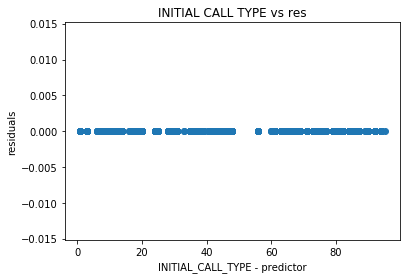

In [132]:
plt.scatter(X_test["INITIAL_CALL_TYPE"],vals["residuals"])
plt.xlabel("INITIAL_CALL_TYPE - predictor")
plt.ylabel("residuals")
plt.title("INITIAL CALL TYPE vs res")
plt.show()

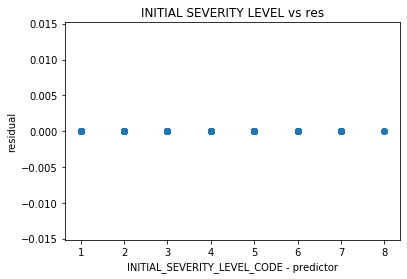

In [135]:
plt.scatter(X_test["INITIAL_SEVERITY_LEVEL_CODE"],vals["residuals"])
plt.xlabel("INITIAL_SEVERITY_LEVEL_CODE - predictor")
plt.ylabel("residual")
plt.title("INITIAL SEVERITY LEVEL vs res")
plt.show()

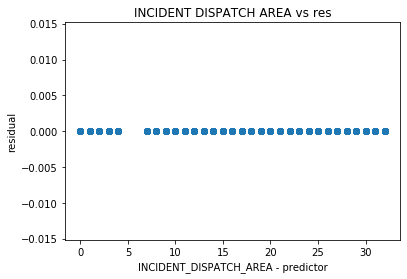

In [136]:
plt.scatter(X_test["INCIDENT_DISPATCH_AREA"],vals["residuals"])
plt.xlabel("INCIDENT_DISPATCH_AREA - predictor")
plt.ylabel("residual")
plt.title("INCIDENT DISPATCH AREA vs res")
plt.show()